In [1]:
import numpy as np
import random
import pandas as pd

import sys
sys.path.append('C:\\Users\\PC\\Documents\\GitHub\\Ugur-dynamic-scheduling\\functions')
import vizings_schedule
from yeni_model import yeni_model
from weighted_days_model import weighted_days_model
from generate_results import generate_results


In [2]:
big_list_v_min = []
big_list_v_max = []
big_list_c_min = []
big_list_c_max = []
big_list_m = []
for n in range(4,10,2):
    teams = list(range(1,n+1))
    days = list(range(1,n))
    #results_df = pd.read_excel('C:\\Users\\PC\\Desktop\\match_resultlar.xlsx', sheet_name='Germany second half')
    results_df = generate_results(teams)
    result_array = np.zeros((n, n), dtype=int)
    for _, row in results_df.iterrows():
        result = row['Result']
        team1 = row['Team 1']
        team2 = row['Team 2']

        index_team1 = teams.index(team1)
        index_team2 = teams.index(team2)

        if team1 == result:
            result_array[index_team1, index_team2] = 3
        elif team2 == result:
            result_array[index_team2, index_team1] = 3
        else:
            result_array[index_team1, index_team2] = 1
            result_array[index_team2, index_team1] = 1
    result_matrix = result_array
    #days = list(range(n-1,0,-1))
    #weights_list = [round(1/i) for i in range(1, n)]
    #print(weights_list)
    number_of_matches = int((n*(n-1))/2)
    print(result_matrix)
    simulation = []
    canon_simulation = []

    for i in range(1,100001):
        timetable = vizings_schedule.vizing(n)
        each_sim = vizings_schedule.calculate_obj_value(n, timetable, result_matrix)
        simulation.append(each_sim)
    big_list_v_min.append(min(simulation))
    big_list_v_max.append(max(simulation))

    for j in range(1,100001):
        canon = vizings_schedule.canonical(n)
        canon_shuffle = vizings_schedule.rndAllRounds(canon, n-1)
        obj_canon= vizings_schedule.calculate_obj_value(n, canon_shuffle, result_matrix)
        canon_simulation.append(obj_canon)
    big_list_c_min.append(min(canon_simulation))
    big_list_c_max.append(max(canon_simulation))


    # Burada result matrixi oluşturuyorum.
    result_array = np.zeros((n, n), dtype=int)
    for _, row in results_df.iterrows():
        result = row['Result']
        team1 = row['Team 1']
        team2 = row['Team 2']

        index_team1 = teams.index(team1)
        index_team2 = teams.index(team2)

        if team1 == result:
            result_array[index_team1, index_team2] = 3
        elif team2 == result:
            result_array[index_team2, index_team1] = 3
        else:
            result_array[index_team1, index_team2] = 1
            result_array[index_team2, index_team1] = 1
    print(result_array)
    data = pd.DataFrame(result_array, columns=teams, index=teams)

    output2, d1_df, d2_df, y_df, z_df, obj_value2, l, l2= weighted_days_model(teams, days, data)
    sonuc = np.array(output2)
    ratings = {i: 0 for i in teams}

    objective_values = []


    for d in days:
        obj_count =0
        for row in sonuc:
            day,team1,team2 = row
            if d==day:
                obj_count +=(abs(ratings[team1] - ratings[team2]))
                ratings[team1] += result_matrix[team1-1,team2-1]
                ratings[team2] += result_matrix[team2-1,team1-1]
        print(ratings)
        objective_values.append(obj_count)
    a = sum(objective_values)
    big_list_m.append(a)
    output, d1_df, d2_df, y_df, z_df, obj_value2, l, l2= weighted_days_model(teams, days, data)
    sonuc2 = np.array(output)
    ratings = {i: 0 for i in teams}

    objective_values = []


    for d in days:
        obj_count =0
        for row in sonuc:
            day,team1,team2 = row
            if d==day:
                obj_count +=(abs(ratings[team1] - ratings[team2]))
                ratings[team1] += result_matrix[team1-1,team2-1]
                ratings[team2] += result_matrix[team2-1,team1-1]
        print(ratings)
        objective_values.append(obj_count)
    b = sum(objective_values)
    big_list_m.append(b)


[[0 3 3 3]
 [0 0 3 3]
 [0 0 0 3]
 [0 0 0 0]]
[[0 3 3 3]
 [0 0 3 3]
 [0 0 0 3]
 [0 0 0 0]]
0.3333333333333333
0.5
1.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmpeeuniblu.pyomo.lp
Reading time = 0.00 seconds
x1: 144 rows, 90 columns, 378 nonzeros
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 144 rows, 90 columns and 378 nonzeros
Model fingerprint: 0xb6cd3e94
Variable types: 36 continuous, 54 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [3e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 15.000

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:186: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:198: FutureWarning: The be

[[0 3 3 3 3 3]
 [0 0 3 3 3 3]
 [0 0 0 3 3 3]
 [0 0 0 0 3 3]
 [0 0 0 0 0 3]
 [0 0 0 0 0 0]]
0.2
0.25
0.3333333333333333
0.5
1.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmpk6w2v63_.pyomo.lp
Reading time = 0.01 seconds
x1: 570 rows, 375 columns, 2025 nonzeros
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 570 rows, 375 columns and 2025 nonzeros
Model fingerprint: 0x6fe1b9b7
Variable types: 150 continuous, 225 integer (75 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 388 rows 

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:186: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:198: FutureWarning: The be

     0     0    1.75000    0   80   11.75000    1.75000  85.1%     -    0s
     0     0    2.25000    0   84   11.75000    2.25000  80.9%     -    0s
     0     0    2.25000    0   83   11.75000    2.25000  80.9%     -    0s
     0     0    2.25000    0   84   11.75000    2.25000  80.9%     -    0s
     0     0    2.37500    0   90   11.75000    2.37500  79.8%     -    0s
     0     0    2.58333    0   94   11.75000    2.58333  78.0%     -    0s
     0     0    2.58333    0   94   11.75000    2.58333  78.0%     -    0s
     0     0    2.58333    0   98   11.75000    2.58333  78.0%     -    0s
     0     0    3.63500    0  103   11.75000    3.63500  69.1%     -    0s
     0     0    3.79369    0  101   11.75000    3.79369  67.7%     -    0s
     0     0    3.84091    0  101   11.75000    3.84091  67.3%     -    0s
     0     0    3.87500    0  103   11.75000    3.87500  67.0%     -    0s
     0     0    4.50000    0   99   11.75000    4.50000  61.7%     -    0s
     0     0    4.50000  

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:186: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:198: FutureWarning: The be

[[0 3 3 3 3 3 3 3]
 [0 0 3 3 3 3 3 3]
 [0 0 0 3 3 3 3 3]
 [0 0 0 0 3 3 3 3]
 [0 0 0 0 0 3 3 3]
 [0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0]]
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmp6o_ja4uz.pyomo.lp
Reading time = 0.04 seconds
x1: 1456 rows, 980 columns, 7252 nonzeros
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1456 rows, 980 columns and 7252 nonzeros
Model fingerprint: 0x06ed8488
Variable types: 392 continuous, 588 integer (196 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:186: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:198: FutureWarning: The be

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmpahjve0fo.pyomo.lp
Reading time = 0.03 seconds
x1: 1456 rows, 980 columns, 7252 nonzeros
Set parameter TimeLimit to value 7200
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1456 rows, 980 columns and 7252 nonzeros
Model fingerprint: 0x06ed8488
Variable types: 392 continuous, 588 integer (196 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 954 rows and 244 columns
Presolve time: 0.02s
Presolved: 502 rows, 736 columns, 4970 nonzeros
Variable types: 0 continuous, 736 integ

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:186: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\weighted_days_model.py:198: FutureWarning: The be

In [3]:
print(big_list_m)
print(big_list_v_min)
print(big_list_c_min)
print(big_list_v_max)
print(big_list_c_max)

[6, 6, 30, 30, 84, 84]
[6, 30, 84]
[6, 30, 84]
[12, 48, 126]
[12, 42, 114]


big_list_v = []
big_list_c = []
big_list_m = []

for n in range(10,12,2):
    teams = list(range(1,n+1))
    days = list(range(1,n))
    #days = list(range(n-1,0,-1))
    #weights_list = [round(1/i) for i in range(1, n)]
    #print(weights_list)
    number_of_matches = int((n*(n-1))/2)
    result_df, result_matrix = vizings_schedule.generate_results(teams)
    print(result_matrix)
    simulation = []
    canon_simulation = []

    for i in range(1,100001):
        timetable = vizings_schedule.vizing(n)
        each_sim = vizings_schedule.calculate_obj_value(n, timetable, result_matrix)
        simulation.append(each_sim)
    big_list_v.append(simulation)

    for j in range(1,100001):
        canon = vizings_schedule.canonical(n)
        canon_shuffle = vizings_schedule.rndAllRounds(canon, n-1)
        obj_canon= vizings_schedule.calculate_obj_value(n, canon_shuffle, result_matrix)
        canon_simulation.append(obj_canon)
    big_list_c.append(canon_simulation)


    # Burada result matrixi oluşturuyorum.
    result_array = np.zeros((n, n), dtype=int)
    for _, row in result_df.iterrows():
        result = row['Result']
        team1 = row['Team 1']
        team2 = row['Team 2']

        index_team1 = teams.index(team1)
        index_team2 = teams.index(team2)

        if team1 == result:
            result_array[index_team1, index_team2] = 3
        elif team2 == result:
            result_array[index_team2, index_team1] = 3
        else:
            result_array[index_team1, index_team2] = 1
            result_array[index_team2, index_team1] = 1
    print(result_array)
    data = pd.DataFrame(result_array, columns=teams, index=teams)

    output2, d1_df, d2_df, y_df, z_df, obj_value2, l, l2= weighted_days_model(teams, days, data)
    sonuc = np.array(output2)
    ratings = {i: 0 for i in teams}

    objective_values = []


    for d in days:
        obj_count =0
        for row in sonuc:
            day,team1,team2 = row
            if d==day:
                obj_count +=(abs(ratings[team1] - ratings[team2]))
                ratings[team1] += result_matrix[team1-1,team2-1]
                ratings[team2] += result_matrix[team2-1,team1-1]
        print(ratings)
        objective_values.append(obj_count)
    a = sum(objective_values)
    big_list_m.append(a)

In [4]:
print(big_list_v)
print(big_list_c)

v=np.array(big_list_v)
c=np.array(big_list_c)
print(np.min(v, axis=1), np.mean(v, axis=1), np.max(v, axis=1))
print(np.min(c, axis=1), np.mean(c, axis=1), np.max(c, axis=1))

print(big_list_m)

NameError: name 'big_list_v' is not defined

In [ ]:
# Burada result matrixi oluşturuyorum.
result_array = np.zeros((n, n), dtype=int)
for _, row in result_df.iterrows():
    result = row['Result']
    team1 = row['Team 1']
    team2 = row['Team 2']

    index_team1 = teams.index(team1)
    index_team2 = teams.index(team2)

    if team1 == result:
        result_array[index_team1, index_team2] = 3
    elif team2 == result:
        result_array[index_team2, index_team1] = 3
    else:
        result_array[index_team1, index_team2] = 1
        result_array[index_team2, index_team1] = 1
print(result_array)
data = pd.DataFrame(result_array, columns=teams, index=teams)


output, d1_df, d2_df, y_df, z_df, obj_value, l, l2= yeni_model(teams, days, data)
ratings1 = {i: 0 for i in teams}
sonuc1 = np.array(output)



for d in days:
    obj_count =0
    for row in sonuc1:
        day,team1,team2 = row
        if d==day:
            obj_count +=(abs(ratings1[team1] - ratings1[team2]))
            ratings1[team1] += result_matrix[team1-1,team2-1]
            ratings1[team2] += result_matrix[team2-1,team1-1]

[[0 1 0 0]
 [1 0 1 0]
 [3 1 0 3]
 [3 3 0 0]]


Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmpkuznthal.pyomo.lp
Reading time = 0.02 seconds
x1: 144 rows, 90 columns, 405 nonzeros
Set parameter TimeLimit to value 14400
Set parameter PoolGap to value 0.1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 144 rows, 90 columns and 405 nonzeros
Model fingerprint: 0x185f360e
Variable types: 36 continuous, 54 integer (18 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 13.0000000
Presolve removed 115 rows and 56 columns
Presolve time: 0.00s
Presolved: 29 

C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\yeni_model.py:164: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  l2 = pd.concat([l2, new_row1.dropna()]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\yeni_model.py:180: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  d1_df = pd.concat([d1_df, new_row1]).reset_index(drop=True)
C:\Users\PC\Documents\GitHub\Ugur-dynamic-scheduling\functions\yeni_model.py:192: FutureWarning: The behavior of DataFram

In [ ]:
# Burada result matrixi oluşturuyorum.
result_array = np.zeros((n, n), dtype=int)
for _, row in result_df.iterrows():
    result = row['Result']
    team1 = row['Team 1']
    team2 = row['Team 2']

    index_team1 = teams.index(team1)
    index_team2 = teams.index(team2)

    if team1 == result:
        result_array[index_team1, index_team2] = 3
    elif team2 == result:
        result_array[index_team2, index_team1] = 3
    else:
        result_array[index_team1, index_team2] = 1
        result_array[index_team2, index_team1] = 1
print(result_array)
data = pd.DataFrame(result_array, columns=teams, index=teams)

output2, d1_df, d2_df, y_df, z_df, obj_value2, l, l2= weighted_days_model(teams, days, data)
sonuc = np.array(output2)
ratings = {i: 0 for i in teams}

objective_values = []


for d in days:
    obj_count =0
    for row in sonuc:
        day,team1,team2 = row
        if d==day:
            obj_count +=(abs(ratings[team1] - ratings[team2]))
            ratings[team1] += result_matrix[team1-1,team2-1]
            ratings[team2] += result_matrix[team2-1,team1-1]
    print(ratings)
    objective_values.append(obj_count)
a = sum(objective_values)

[[0 0 1 1 0 1 1 0 0 3 1 1]
 [3 0 3 3 3 3 3 0 0 3 0 0]
 [1 0 0 1 3 1 1 1 1 0 0 1]
 [1 0 1 0 3 3 0 3 3 1 1 1]
 [3 0 0 0 0 3 3 3 1 0 3 0]
 [1 0 1 0 0 0 0 3 3 0 1 1]
 [1 0 1 3 0 3 0 1 0 0 0 1]
 [3 3 1 0 0 0 1 0 0 0 1 3]
 [3 3 1 0 1 0 3 3 0 3 1 3]
 [0 0 3 1 3 3 3 3 0 0 1 1]
 [1 3 3 1 0 1 3 1 1 1 0 0]
 [1 3 1 1 3 1 1 0 0 1 3 0]]
0.0007513148009015778
0.001
0.0013717421124828531
0.001953125
0.0029154518950437317
0.004629629629629629
0.008
0.015625
0.037037037037037035
0.125
1.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-08
Read LP format model from file C:\Users\PC\AppData\Local\Temp\tmp4ffer_ab.pyomo.lp
Reading time = 0.03 seconds
x1: 5280 rows, 3630 columns, 65769 nonzeros
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model wit

In [ ]:
print(simulation)
simulation = np.array(simulation)
mean = np.mean(simulation)
print(mean)
print(obj_canon)
print(a)
#print(obj_value)
print(np.min(simulation))

[148, 134, 121, 120, 123, 159, 111, 134, 129, 165, 138, 130, 155, 126, 155, 149, 134, 113, 167, 153, 127, 137, 125, 138, 157, 139, 116, 130, 136, 131, 142, 123, 118, 121, 140, 133, 140, 123, 122, 129, 143, 145, 108, 145, 144, 138, 116, 131, 119, 142, 115, 166, 115, 141, 141, 149, 143, 148, 152, 156, 120, 107, 130, 133, 152, 120, 122, 126, 147, 147, 131, 146, 112, 139, 146, 138, 106, 117, 152, 139, 131, 125, 123, 94, 169, 153, 121, 118, 102, 125, 127, 133, 123, 127, 142, 156, 124, 127, 136, 136, 135, 103, 142, 143, 156, 120, 130, 113, 142, 144, 115, 146, 136, 143, 134, 123, 104, 156, 158, 141, 109, 144, 140, 135, 126, 142, 144, 128, 102, 113, 140, 163, 114, 127, 130, 120, 130, 138, 114, 136, 142, 160, 132, 158, 122, 170, 130, 125, 98, 135, 124, 129, 116, 138, 146, 138, 143, 114, 141, 142, 127, 125, 137, 132, 136, 118, 150, 137, 107, 134, 149, 122, 134, 146, 169, 131, 138, 150, 127, 123, 129, 113, 156, 157, 162, 163, 143, 122, 102, 126, 145, 120, 153, 155, 141, 129, 132, 106, 137, 137, 1

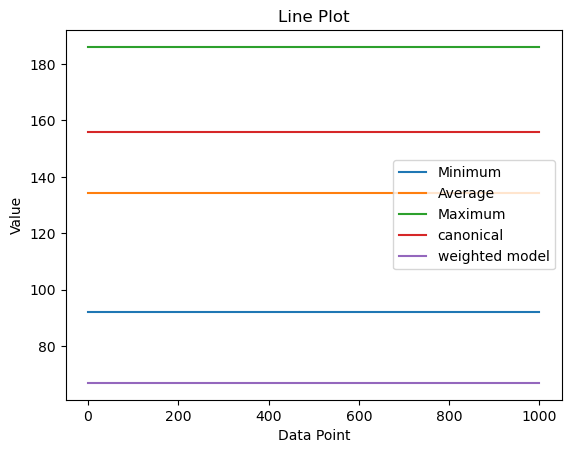

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = list(range(1, len(simulation)+1))

# Calculate minimum, average, and maximum
min_values = np.min(simulation)
avg_values = np.mean(simulation)
max_values = np.max(simulation)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot each line without markers
ax.plot(x, [min_values]*len(x), label='Minimum')
ax.plot(x, [avg_values]*len(x), label='Average')
ax.plot(x, [max_values]*len(x), label='Maximum')
ax.plot(x, [obj_canon]*len(x), label='canonical')
ax.plot(x, [a]*len(x), label='weighted model')
#ax.plot(x, [obj_value]*len(x), label='model')

# Set labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')
ax.set_title('Line Plot')

# Add legend
ax.legend()

# Show the plot
plt.show()


teams = list(range(1,n+1))
days = list(range(1,n))
non_zero_entries = timetable[1:, 1:]

new_format_list = []

# Iterate through the timetable matrix to extract day, team1, and team2 information
for team1 in range(n):
    for team2 in range(n):
        day = non_zero_entries[team2, team1]
        new_format_list.append([day, team1, team2])

# Convert the list to a NumPy array
new_format_array = np.array(new_format_list)
new_format_array[:, 1:] += 1
new_format_array = new_format_array[new_format_array[:, 0].argsort()]
new_format_array = new_format_array[new_format_array[:, 2] < new_format_array[:, 1]]
solution_df = pd.DataFrame(new_format_array, columns=['Day', 'Team 1', 'Team 2'])
relevant_matches = pd.DataFrame(columns=['Team 1', 'Team 2', 'Day'])
for _, row in solution_df.iterrows():
    day = row['Day']
    team1 = row['Team 1']
    team2 = row['Team 2']
    if team1 < team2:
        relevant_matches = pd.concat([relevant_matches, pd.DataFrame({'Team 1': [team1], 'Team 2': [team2], 'Day': [day]})],
                                                    ignore_index=True)
    else:
        relevant_matches = pd.concat([relevant_matches, pd.DataFrame({'Team 1': [team2], 'Team 2': [team1], 'Day': [day]})],
                                                    ignore_index=True)
result_array = np.zeros((n, n), dtype=int)
for _, row in result_df.iterrows():
    result = row['Result']
    team1 = row['Team 1']
    team2 = row['Team 2']

    index_team1 = teams.index(team1)
    index_team2 = teams.index(team2)

    if team1 == result:
        result_array[index_team1, index_team2] = 3
    elif team2 == result:
        result_array[index_team2, index_team1] = 3
    else:
        result_array[index_team1, index_team2] = 1
        result_array[index_team2, index_team1] = 1
print(result_array)
data = pd.DataFrame(result_array, columns=teams, index=teams)



output, d1_df, d2_df, y_df, z_df, obj_value, l, l2= yeni_model(teams,days,data)

import matplotlib.pyplot as plt
import numpy as np

data_model = {4: 6, 6: 8, 8: 27, 10: 35, 12: 64, 14: 102, 20: 537}
data_sim = {4: 7.8, 6: 23.2, 8: 62.5, 10: 106.2, 12: 183, 14: 283.3, 20: 749.8}

# Extract keys and values
keys = list(data_model.keys())
values_model = list(data_model.values())
values_sim = list(data_sim.values())

# Create a bar chart
bar_width = 0.35
index = np.arange(len(keys))

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

bar1 = ax.bar(index, values_model, bar_width, label='Model', color='skyblue', edgecolor='black')
bar2 = ax.bar(index + bar_width, values_sim, bar_width, label='Mean of 1000 schedules', color='lightcoral', edgecolor='black')

# Set labels and title
ax.set_xlabel('Number of Teams', fontsize=14)
ax.set_ylabel('Objective Values', fontsize=14)
ax.set_title('Comparison Model with 1000 Random Schedules', fontsize=16)
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(keys)
ax.legend()

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value annotations on top of the bars
for i, v in enumerate(values_model):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

for i, v in enumerate(values_sim):
    ax.text(i + bar_width, v + 10, str(v), ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


obj_data = (7730, 7418, 630, 576, 558, 554, 536 ,528, 518, 508, 506, 504, 497, 484, 465, 460, 449, 442, 423, 414, 412, 408, 407, 406, 401, 400, 398, 397, 395, 393, 391, 389, 384, 382, 375, 369, 367, 361)
time_change = (12.1, 12.5, 15, 16, 87, 89, 148, 830, 861, 892, 893, 894, 932, 975, 1005, 2017, 2887, 2928, 2929, 2977, 3017, 3018, 3168, 3220, 3382, 3647, 3648, 3952, 4252, 6514, 6515, 6549, 6563, 6564, 7025, 7080,9485,9869)
print(len(obj_data))
print(len(time_change))
obj_data_dict = {i: obj_data[i] for i in range(len(obj_data))}
time_change_dict = {i: time_change[i] for i in range(len(time_change))}

# Create a numpy array with two columns
data_array = np.column_stack((time_change, obj_data))

print(data_array)



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Your data
obj_data = (7730, 7418, 630, 576, 558, 554, 536, 528, 518, 508, 506, 504, 497, 484, 465, 460, 449, 442, 423, 414, 412, 408, 407, 406, 401, 400, 398, 397, 395, 393, 391, 389, 384, 382, 375, 369, 367, 361, 361)
time_change = (12.1, 12.5, 15, 16, 87, 89, 148, 830, 861, 892, 893, 894, 932, 975, 1005, 2017, 2887, 2928, 2929, 2977, 3017, 3018, 3168, 3220, 3382, 3647, 3648, 3952, 4252, 6514, 6515, 6549, 6563, 6564, 7025, 7080, 9485, 9869, 14400)

# Create a numpy array with two columns
data_array = np.column_stack((time_change, obj_data))

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data using Seaborn with specified colors
line = sns.lineplot(x=time_change, y=obj_data, color='skyblue', ax=ax)
scatter = sns.scatterplot(x=time_change, y=obj_data, color='red', ax=ax, s=40, zorder=10)

# Set the y-axis limits
ax.set_ylim(250, 800)

# Set plot labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Objective Value')
ax.set_title('Change of Objective Values throughout the iterations (18 teams)')

# Add legend with a note
legend_labels = {'first': 'First iteration: 7730', 'second': 'Second iteration: 7418'}

# Create custom legend handler for red dots
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=label) for label in legend_labels.values()]

# Add legend with custom elements
ax.legend(handles=[line, *legend_elements])

# Show plot
plt.show()


non_zero_entries = timetable[1:, 1:]

new_format_list = []

# Iterate through the timetable matrix to extract day, team1, and team2 information
for team1 in range(n):
    for team2 in range(n):
        day = non_zero_entries[team2, team1]
        new_format_list.append([day, team1, team2])

# Convert the list to a NumPy array
new_format_array = np.array(new_format_list)
new_format_array[:, 1:] += 1
new_format_array = new_format_array[new_format_array[:, 0].argsort()]
new_format_array = new_format_array[new_format_array[:, 2] < new_format_array[:, 1]]
solution_df = df = pd.DataFrame(new_format_array, columns=['Day', 'Team 1', 'Team 2'])

path = ('C:/Users/ug033207/vizings deneme.xlsx')
with pd.ExcelWriter(path, engine='xlsxwriter') as excel_writer:

# Write each DataFrame to a different sheet
    solution_df.to_excel(excel_writer, sheet_name='solution', index=False)
    result_df.to_excel(excel_writer, sheet_name='results', index=False)




new_format_array = np.hstack((new_format_array, np.zeros((new_format_array.shape[0], 1))))

# Iterate through each row in new_format_array
for row_idx in range(new_format_array.shape[0]):
    # Extract team1 and team2 from the current row
    team1 = int(new_format_array[row_idx, 1])
    team2 = int(new_format_array[row_idx, 2])

    # Find the corresponding row in results_df based on team1 and team2
    match_result = results_df[((results_df['Team 1'] == team1) & (results_df['Team 2'] == team2)) |
                               ((results_df['Team 1'] == team2) & (results_df['Team 2'] == team1))]['Result'].values

    # If a match result is found, update the new column in new_format_array
    if len(match_result) > 0:
        new_format_array[row_idx, -1] = match_result[0]